In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using JLD, CairoMakie, GLMakie

In [3]:
path = "C:\\Users\\Alex\\YandexDisk\\Science\\TM\\Levanova\\3 набор параметров\\Map LSE\\200x200";
filenameLS = "\\LSs_200x200.jld"
filenameu0s = "\\u0s_200x200.jld"
pathLS = path*filenameLS
pathu0s = path*filenameu0s;

In [4]:
Λs = load(pathLS)["data"];

In [5]:
I0range = range( -1.40, -1.709, length = 201 )
U0range = range( 0.3,  0.47, length = 201)

0.3:0.00085:0.47

In [6]:
color_matrix = zeros(201, 201);

In [7]:
function check_condition(spectrum)
    
    checknull(spectrum[1]) && checknull(spectrum[2])  && spectrum[3]<0 ? color = 0 :
    checknull(spectrum[1]) && spectrum[2]<0  ? color = 1 :
    spectrum[1]>0  && checknull(spectrum[2])  && spectrum[3]<0 ? color = 3 :
    -1
    
end

function checknull(value)
    isapprox(value, 0.0; atol = 1e-1)
end

checknull (generic function with 1 method)

In [8]:
for (i, k1) in enumerate(I0range)
    
    for (j, k2) in enumerate(U0range)
        spectrum = Λs[i, j, :]
        color_matrix[i, j] = check_condition(spectrum)
    end
end

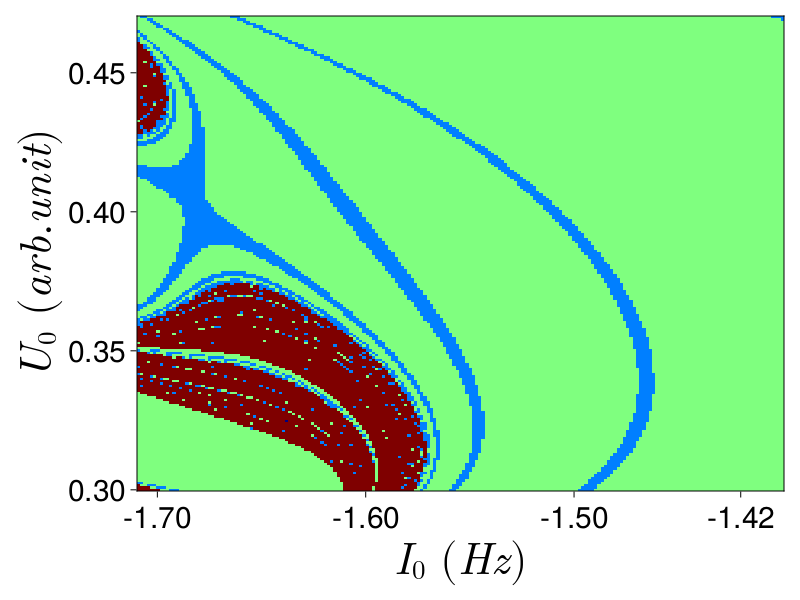

CairoMakie.Screen{IMAGE}


In [9]:
CairoMakie.activate!()
f = Figure()
ax1 = Axis(f[1, 1], xlabel = L"$I_0$ $(Hz)$",ylabel = L"$U_0$ $(arb. unit)$", xlabelsize = 45, ylabelsize = 45,
            xticklabelsize = 30, yticklabelsize = 30,
            xgridvisible  = false, ygridvisible = false, xticks = [-1.7, -1.6, -1.5, -1.42])
heatmap!(I0range, U0range, color_matrix, colormap = :jet)
display(f)

In [10]:
save("map_LS.eps", f)

CairoMakie.Screen{EPS}
